<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/ml/PyCaretRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyCaret で回帰分析のデモ

[「Regression Tutorial - Level Beginner」](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb)と
[「Regression - Level Intermediate」](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)より。

## インストール

[pip から PyCaret インストール。](https://pycaret.gitbook.io/docs/get-started/installation)

[jinja2 関連のエラーは pandas-profiling==3.1.0 で回避。](https://teratail.com/questions/5b01vplewor7kl)

In [1]:
# install pycaret
!pip install --upgrade pycaret pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 前準備

Diamonds タスクのデータセットを取得。
データ形式は DataFrame。

In [2]:
from pycaret.datasets import get_data
import pandas as pd

dataset: pd.DataFrame = get_data('diamond')
print(f"Table size = {dataset.shape}")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


Table size = (6000, 8)


回帰タスクのために学習データとバリデーションデータに分割

In [3]:
# 90% ランダム抽出, 再現性のためにシード random_state を固定
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

# 行番号振り直し
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print(f'Data for Modeling: {data.shape}')
print(f'Unseen Data For Predictions: {data_unseen.shape}')

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


## 前処理

PyCaret では regression.setup() だけで前処理完了。
詳細は [API リファレンス](https://pycaret.readthedocs.io/en/latest/api/regression.html)を参照。

実行後に表示される DataType に問題がなければ Enter キーを押下。
押下後に前処理の詳細が表示される。

In [4]:
from pycaret import regression

exp_reg102 = regression.setup(
    # 学習タスクの設定 & シードの固定
    data = data, target = 'Price', session_id=123,
    # 数値変数の標準化 & Yeo-Johnson 変換 (非線形変換) による Gauss-like 分布化
    normalize = True, transformation = True, transform_target = True, 
    # 頻度の低いカテゴリ変数を統合
    combine_rare_levels = True, rare_level_threshold = 0.05,
    # 相関関係から数値変数の重複を削除
    remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
    # 数値変数をカテゴリ変数に変換
    bin_numeric_features = ['Carat Weight'],
    log_experiment = True, experiment_name = 'diamond1') 

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 39)"


## 学習

### モデル選択

使用できるモデルの一覧を表示。 full インストールだと catboost, xgboost なども追加される。

In [5]:
regression.models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


クロスバリデーションで性能比較。

RANSAC は検証対象外に設定。戻り値は上位3モデルのリスト。

[チュートリアル](https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Intermediate%20-%20REG102.ipynb)
には前処理によってスコアが上昇したことが指摘されている。

In [6]:
from typing import List
from pycaret.internal.meta_estimators import PowerTransformedTargetRegressor

top3: List[PowerTransformedTargetRegressor] = \
    regression.compare_models(exclude = ['ransac'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,766.0853,3.116467e+06,1704.0975,0.9704,0.0799,0.0576,0.118
rf,Random Forest Regressor,850.1194,3.267554e+06,1770.6698,0.9686,0.0904,0.0657,1.093
huber,Huber Regressor,940.6199,3.651906e+06,1891.7125,0.9640,0.0972,0.0708,0.169
ridge,Ridge Regression,952.2538,3.846278e+06,1934.6314,0.9624,0.0971,0.0715,0.060
br,Bayesian Ridge,956.6502,3.999160e+06,1967.8153,0.9608,0.0972,0.0716,0.033
lr,Linear Regression,960.2937,4.046533e+06,1978.6945,0.9604,0.0973,0.0717,0.755
et,Extra Trees Regressor,964.4979,4.410739e+06,2062.2772,0.9569,0.1055,0.0759,1.234
dt,Decision Tree Regressor,1000.2500,4.685153e+06,2136.9863,0.9539,0.1082,0.0778,0.040
gbr,Gradient Boosting Regressor,1107.4885,5.269003e+06,2255.3276,0.9486,0.1100,0.0832,0.293
par,Passive Aggressive Regressor,1341.4005,7.149373e+06,2588.2842,0.9288,0.1282,0.0964,0.033


### モデルチューニング

モデル作成

In [7]:
lightgbm = regression.create_model('lightgbm', fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,854.7383,5.085739e+06,2255.1583,0.9541,0.0819,0.0590
1,737.8828,1.941999e+06,1393.5563,0.9806,0.0770,0.0580
2,759.7694,4.185480e+06,2045.8447,0.9576,0.0805,0.0565
3,833.0629,3.656777e+06,1912.2701,0.9606,0.0831,0.0597
4,792.5717,3.008038e+06,1734.3695,0.9709,0.0862,0.0589
Mean,795.6050,3.575607e+06,1868.2398,0.9648,0.0817,0.0584
Std,43.6465,1.063000e+06,292.0389,0.0097,0.0030,0.0011


探索空間を定義

In [8]:
import numpy as np
lgbm_params = {
    'num_leaves': np.arange(10,200,10),
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'learning_rate': np.arange(0.1,1,0.1)
    }

パラメータチューニング

In [9]:
tuned_lightgbm = regression.tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,822.6400,2.569288e+06,1602.8998,0.9718,0.0868,0.0641
1,1008.9226,6.724758e+06,2593.2138,0.9485,0.0860,0.0618
2,815.8761,2.461915e+06,1569.0490,0.9774,0.0857,0.0628
3,805.5570,2.066453e+06,1437.5162,0.9772,0.0805,0.0620
4,814.8100,2.151031e+06,1466.6394,0.9732,0.0904,0.0664
5,881.7793,4.766152e+06,2183.1518,0.9593,0.0838,0.0608
6,951.9875,4.092100e+06,2022.8940,0.9616,0.0906,0.0662
7,872.9769,3.230169e+06,1797.2671,0.9592,0.0889,0.0654
8,790.5395,2.393345e+06,1547.0439,0.9765,0.0801,0.0609


チューニング結果を表示

In [10]:
regression.plot_model(tuned_lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.7000000000000001
max_depth,80
min_child_samples,20
min_child_weight,0.001
min_split_gain,0.0
n_estimators,100


## 可視化

特徴量の重要度

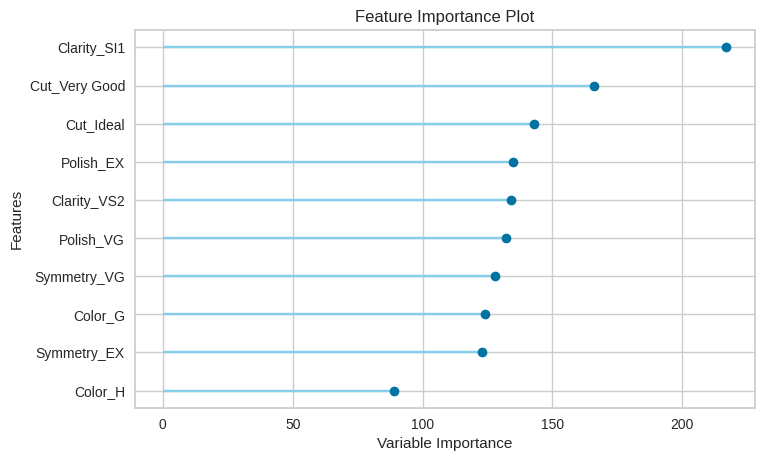

In [12]:
regression.plot_model(tuned_lightgbm, plot='feature')

タブで可視化内容を切り替えられる API も存在

In [13]:
regression.evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## モデル決定

In [15]:
regression.predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,859.7053,4.258740e+06,2063.6715,0.9612,0.0855,0.0617


決定したハイパーパラメータを用い、学習データ全体で学習。

（クロスバリデーションでは一部データで学習していた）

In [18]:
final_lightgbm = regression.finalize_model(tuned_lightgbm)
print(final_lightgbm)

PowerTransformedTargetRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.7000000000000001, max_depth=80,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=30, objective=None,
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True...
                                                        learning_rate=0.7000000000000001,
                                                        max_depth=80,
                                                        min_child_samples=20,
                                                        min_child_weight=0.001,
                                                        min_split_gain=0.0,
              

最終的な機械学習モデルの性能をチェック

In [20]:
regression.predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,586.0376,1417608.605,1190.6337,0.9871,0.0577,0.0436


## 予測

データ予測を実施

In [22]:
unseen_predictions = regression.predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,827.2334,2.248977e+06,1499.6589,0.9781,0.0797,0.0607


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13130.893671
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10567.033220
2,1.01,Good,E,SI1,G,G,GIA,5161,4961.249017
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32539.520528
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4140.860588


決定係数を計算

In [23]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9781

モデルを保存

In [24]:
regression.save_model(final_lightgbm,'Final LightGBM Model 25Nov2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                                                                          learning_rate=0.7000000000000001,
                                                                          max_depth=80,
                                                                          min_child_samples=20,
                     

## モデルの再読み込み

In [26]:
saved_final_lightgbm = regression.load_model('Final LightGBM Model 25Nov2020')
new_prediction = regression.predict_model(saved_final_lightgbm, data=data_unseen)
new_prediction.head()

Transformation Pipeline and Model Successfully Loaded


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,827.2334,2.248977e+06,1499.6589,0.9781,0.0797,0.0607


,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,13130.893671
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10567.033220
2,1.01,Good,E,SI1,G,G,GIA,5161,4961.249017
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,32539.520528
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4140.860588
